# This project is about trying to predict which Wilaya is the best to have a real shop for this E-Commerce shop.

In [45]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Reading the excel sheet - data

In [46]:
data=pd.read_excel("Downloads/ShopsDatabase.xlsx")
data

,Wilaya,Mois,Colonne1,Modeles,Price,Levels,Sell in,Sell out,Monthly Stock Turnover,Revenue
0,Tipaza,1,1,A5s,25200,Level C,6,8,0.75,151200
1,Tipaza,1,1,A1K,19700,Level C,2,4,0.50,39400
2,Tipaza,1,1,Reno 2F,55900,Level C,0,0,0.00,0
3,Tipaza,1,1,A31 (4+64),32600,Level C,0,0,0.00,0
4,Tipaza,1,1,Reno 3,58700,Level C,0,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...
129002,Blida,11,11,A93,51900,New shop,0,0,0.00,0
129003,Tipaza,11,11,A93,51900,Level D,0,0,0.00,0
129004,Alger Ouest,11,11,A93,51900,New shop,0,0,0.00,0
129005,Bouira,11,11,A93,51900,Level D,0,0,0.00,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129007 entries, 0 to 129006
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Wilaya                  129007 non-null  object 
 1   Mois                    129007 non-null  int64  
 2   Colonne1                129007 non-null  int64  
 3   Modeles                 129007 non-null  object 
 4   Price                   129007 non-null  int64  
 5   Levels                  129007 non-null  object 
 6   Sell in                 129007 non-null  int64  
 7   Sell out                129007 non-null  int64  
 8   Monthly Stock Turnover  129007 non-null  float64
 9   Revenue                 129007 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 9.8+ MB


### This data contain 10 columns and 129007 rows

In [48]:
print(data.isnull().sum())

Wilaya                    0
Mois                      0
Colonne1                  0
Modeles                   0
Price                     0
Levels                    0
Sell in                   0
Sell out                  0
Monthly Stock Turnover    0
Revenue                   0
dtype: int64


### We don't have any null value

# Let's try some visualizations using Matplotlib and Seaborn

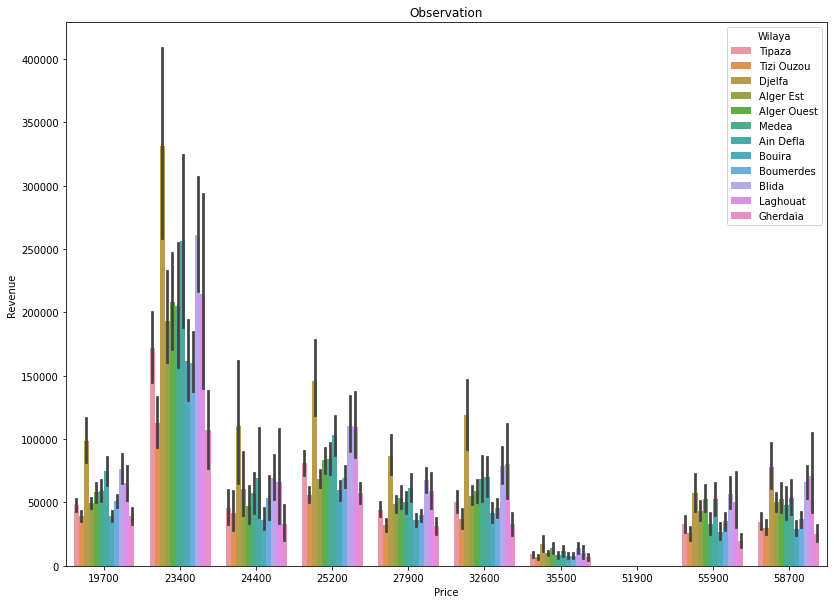

In [49]:
fig = plt.figure(figsize=(30,10))
fig.add_subplot(121)
plt.title('Observation')
sns.barplot(data=data, x='Price',y='Revenue',hue='Wilaya')
plt.show()

# Converting Wilayas to their Zip codes (48 wilayas)

In [50]:
data['Wilaya']=data['Wilaya'].replace(['Tipaza', 'Tizi Ouzou', 'Djelfa', 'Alger Est', 'Alger Ouest', 'Medea', 'Ain Defla', 'Bouira','Boumerdes', 'Laghouat','Gherdaia','Blida'],[42,15,17,61,16,26,44,10,35,3,47,9])

## Observation of Wilayas after the conversion

<AxesSubplot:title={'center':'Wilaya observation'}, xlabel='Wilaya', ylabel='Frequency'>

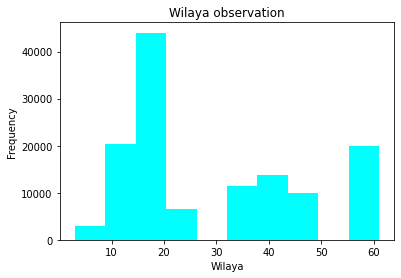

In [51]:
plt.title("Wilaya observation")
plt.xlabel("Wilaya")
data['Wilaya'].plot.hist(color = 'Cyan')

# Visualization of Wilayas vs Revenue

<AxesSubplot:title={'center':'Wilaya x Revenue'}, xlabel='Wilaya', ylabel='Revenue'>

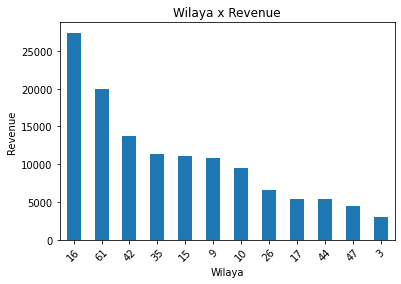

In [52]:
plt.xlabel("Wilaya")
plt.ylabel("Revenue")
plt.title("Wilaya x Revenue")
visu = data["Wilaya"].value_counts()
visu.plot.bar(rot=45)

### Result : 
As we can see, Algiers (16) has the most significant revenue rate.

# Plotting the correlation map

In [53]:
def plot_correlation_map(data):
    corr = data.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def category_values(Revenue, Wilaya):
    for c in Survived:
        print('\n', Revenue.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', Revenue[c].isnull().sum())

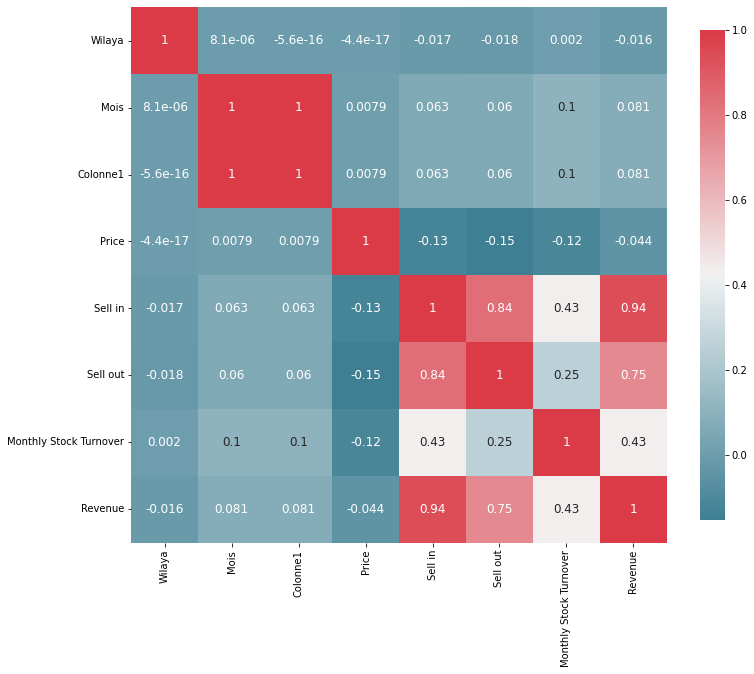

In [54]:
plot_correlation_map(data)

### The mean of Wilaya and Revenue

In [55]:
data[["Revenue", "Wilaya"]].groupby(["Revenue"], as_index=True).mean()

,Wilaya
Revenue,
0,28.738554
19700,29.247359
23400,26.909091
24400,23.927711
25200,28.561629
...,...
8049600,16.000000
8240400,9.000000
8335400,16.000000


### The mean of Wilaya and Sell out

In [56]:
data[["Sell out", "Wilaya"]].groupby(["Sell out"], as_index=True).mean()

,Wilaya
Sell out,
0,28.771668
1,29.093285
2,29.082435
3,29.322987
4,29.756481
...,...
210,16.000000
229,9.000000
237,16.000000


### The mean of Revenue and Price

In [57]:
data[["Revenue", "Price"]].groupby(["Revenue"], as_index=True).mean()

,Price
Revenue,
0,38175.847466
19700,19700.000000
23400,23400.000000
24400,24400.000000
25200,25200.000000
...,...
8049600,55900.000000
8240400,25200.000000
8335400,58700.000000


# Knn Definition
## K-Nearest-Neighbor algorithm, often abbreviated K-NN, is used to classify new data based on the assumption that it’s similar to its K nearest neighbors.

# Knn Steps
## For a given data point x of an unknown class:
•	Introduce the value of K.

•	Calculate the distance between x and all the data points in the training data.

•	Model picks K entries in the database which are closest to the new data point.

•	Then it takes the majority vote i.e the most common class/label among those K entries and that will be the class of the new data point.


### Choosing the features as x and the target as y

In [58]:
x=data[['Wilaya','Price','Sell in','Sell out']]
y=data['Revenue']
data

,Wilaya,Mois,Colonne1,Modeles,Price,Levels,Sell in,Sell out,Monthly Stock Turnover,Revenue
0,42,1,1,A5s,25200,Level C,6,8,0.75,151200
1,42,1,1,A1K,19700,Level C,2,4,0.50,39400
2,42,1,1,Reno 2F,55900,Level C,0,0,0.00,0
3,42,1,1,A31 (4+64),32600,Level C,0,0,0.00,0
4,42,1,1,Reno 3,58700,Level C,0,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...
129002,9,11,11,A93,51900,New shop,0,0,0.00,0
129003,42,11,11,A93,51900,Level D,0,0,0.00,0
129004,16,11,11,A93,51900,New shop,0,0,0.00,0
129005,10,11,11,A93,51900,Level D,0,0,0.00,0


# Knn Code 

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #split our data with test size of 30% 

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.9146190217812573


# Optimal K Value

In [60]:
n_neighbors=20
scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.92
Accuracy for k= 2 is: 0.92
Accuracy for k= 3 is: 0.92
Accuracy for k= 4 is: 0.92
Accuracy for k= 5 is: 0.92
Accuracy for k= 6 is: 0.92
Accuracy for k= 7 is: 0.93
Accuracy for k= 8 is: 0.93
Accuracy for k= 9 is: 0.93
Accuracy for k= 10 is: 0.93
Accuracy for k= 11 is: 0.93
Accuracy for k= 12 is: 0.94
Accuracy for k= 13 is: 0.94
Accuracy for k= 14 is: 0.94
Accuracy for k= 15 is: 0.94
Accuracy for k= 16 is: 0.94
Accuracy for k= 17 is: 0.95
Accuracy for k= 18 is: 0.95
Accuracy for k= 19 is: 0.96


# The best Accuracy

In [61]:
print("the best Accuracy is",np.max(scores))
print("best k is :", np.argmax(scores)+1)

the best Accuracy is 0.96
best k is : 19


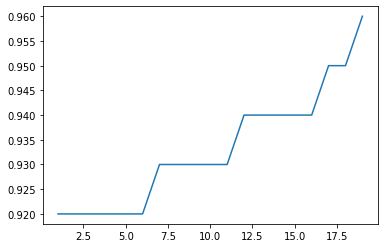

In [62]:
plt.plot(range(1,20),scores)